In [1]:
from mtcnn import MTCNN
import cv2
import numpy as np
from matplotlib import pyplot as plt

detector = MTCNN()

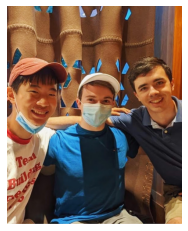

In [2]:
# load a sample image
img = cv2.cvtColor(cv2.imread("test_face_3.jpg"), cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

[{'box': [229, 249, 108, 130], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (266, 295), 'right_eye': (314, 297), 'nose': (293, 327), 'mouth_left': (267, 346), 'mouth_right': (305, 348)}}, {'box': [403, 202, 111, 130], 'confidence': 0.9999582767486572, 'keypoints': {'left_eye': (432, 260), 'right_eye': (480, 244), 'nose': (462, 275), 'mouth_left': (448, 302), 'mouth_right': (493, 289)}}, {'box': [38, 212, 134, 161], 'confidence': 0.9998549222946167, 'keypoints': {'left_eye': (87, 266), 'right_eye': (147, 278), 'nose': (115, 310), 'mouth_left': (72, 324), 'mouth_right': (131, 336)}}]


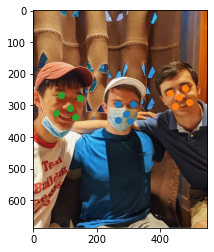

In [3]:
# get face detection output, print details, and display keypoints
out = detector.detect_faces(img)
print(out)

plt.imshow(img)
for face in out:
    pts = list(face['keypoints'].values())
    plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

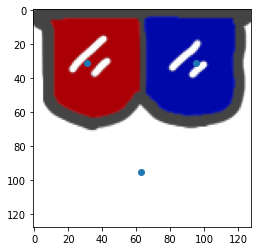

In [4]:
# load filter
en_filt = cv2.cvtColor(cv2.imread('en_glasses.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

plt.imshow(en_filt) 
plt.scatter([31, 63, 95], [31, 95, 31]) # alignment points

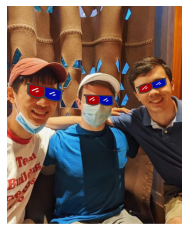

In [5]:
# fit filter to face
filt_pts = np.array([[31, 31], [63, 95], [95, 31]], dtype=np.float32)

plt.axis('off')
plt.imshow(img)

for face in out:
    pts = list(face['keypoints'].values())
    img_pts = np.ones((3,2), dtype=np.float32)
    img_pts[0, :] = pts[0] # left eye
    img_pts[1, :] = pts[2] # nose
    img_pts[2, :] = pts[1] # right eye

    M = cv2.getAffineTransform(filt_pts, img_pts)
    filtOut = cv2.warpAffine(en_filt, M, (img.shape[1], img.shape[0]))

    plt.imshow(filtOut)



[-2.0000e+00  4.8000e+01 -1.3628e+04]
[-2.0000e+00  3.8000e+01 -1.2614e+04]
[ 4.800000e+01  1.362800e+04 -4.033028e+06]
[ 4.800000e+01  1.362800e+04 -4.062588e+06]
[[ 266.          295.        ]
 [ 314.          297.        ]
 [-641.28363136  298.19559835]
 [-602.65639615  300.22861073]]
[ 1.6000e+01  4.8000e+01 -1.9392e+04]
[ 1.3000e+01  4.5000e+01 -1.9414e+04]
[ 4.800000e+01  1.939200e+04 -5.062656e+06]
[ 4.800000e+01  1.939200e+04 -4.754688e+06]
[[432.         260.        ]
 [480.         244.        ]
 [594.77933551 259.59708085]
 [650.22777031 243.57864413]]
[-1.2000e+01  6.0000e+01 -1.4916e+04]
[-1.2000e+01  5.9000e+01 -1.8252e+04]
[ 6.000000e+01  1.491600e+04 -3.972876e+06]
[ 6.000000e+01  1.491600e+04 -4.155468e+06]
[[  87.          266.        ]
 [ 147.          278.        ]
 [-207.34527644  267.18401157]
 [-148.32588258  279.18795608]]


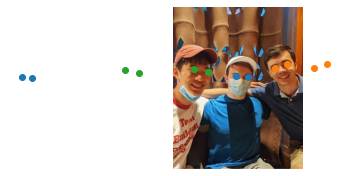

In [6]:
import face_filters_video

plt.axis('off')
plt.imshow(img)

for face in out:
    persp_pts = face_filters_video.get_persp_face_pts(face)
    print(persp_pts)
    plt.scatter(persp_pts[:,0], persp_pts[:,1])